In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



In [4]:
df = pd.read_csv('AB_NYC_2019.csv')

In [5]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# Data Wrangling

In [6]:
df.shape

(48895, 16)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [10]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [11]:
#removing unessary colummns
df.drop('id', axis=1, inplace=True)
df.drop('host_id', axis=1, inplace=True)
df.drop('name', axis=1, inplace=True)
df.drop('host_name', axis=1, inplace=True)

In [12]:
df.shape

(48895, 12)

In [15]:
#Number of quantitative and qualitative variables
print('Number of quantitative features: {}'.format(len([d for d in df.columns if df.dtypes[d] != 'object'])))
print('Number of qualitative features: {}'.format(len([d for d in df.columns if df.dtypes[d] == 'object'])))

Number of quantitative features: 8
Number of qualitative features: 4


In [17]:
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [21]:
df['last_review'] = df['last_review'].apply(pd.to_datetime)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   neighbourhood_group             48895 non-null  object        
 1   neighbourhood                   48895 non-null  object        
 2   latitude                        48895 non-null  float64       
 3   longitude                       48895 non-null  float64       
 4   room_type                       48895 non-null  object        
 5   price                           48895 non-null  int64         
 6   minimum_nights                  48895 non-null  int64         
 7   number_of_reviews               48895 non-null  int64         
 8   last_review                     38843 non-null  datetime64[ns]
 9   reviews_per_month               38843 non-null  float64       
 10  calculated_host_listings_count  48895 non-null  int64         
 11  av

In [27]:
#Checking the number of neighbourhood_groups
df['neighbourhood_group'].nunique(dropna=False)

5

In [28]:
#The actual negibourhood groups
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [29]:
#Checking the number of room_types
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

# Missing values

In [31]:

df.isnull().sum()

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

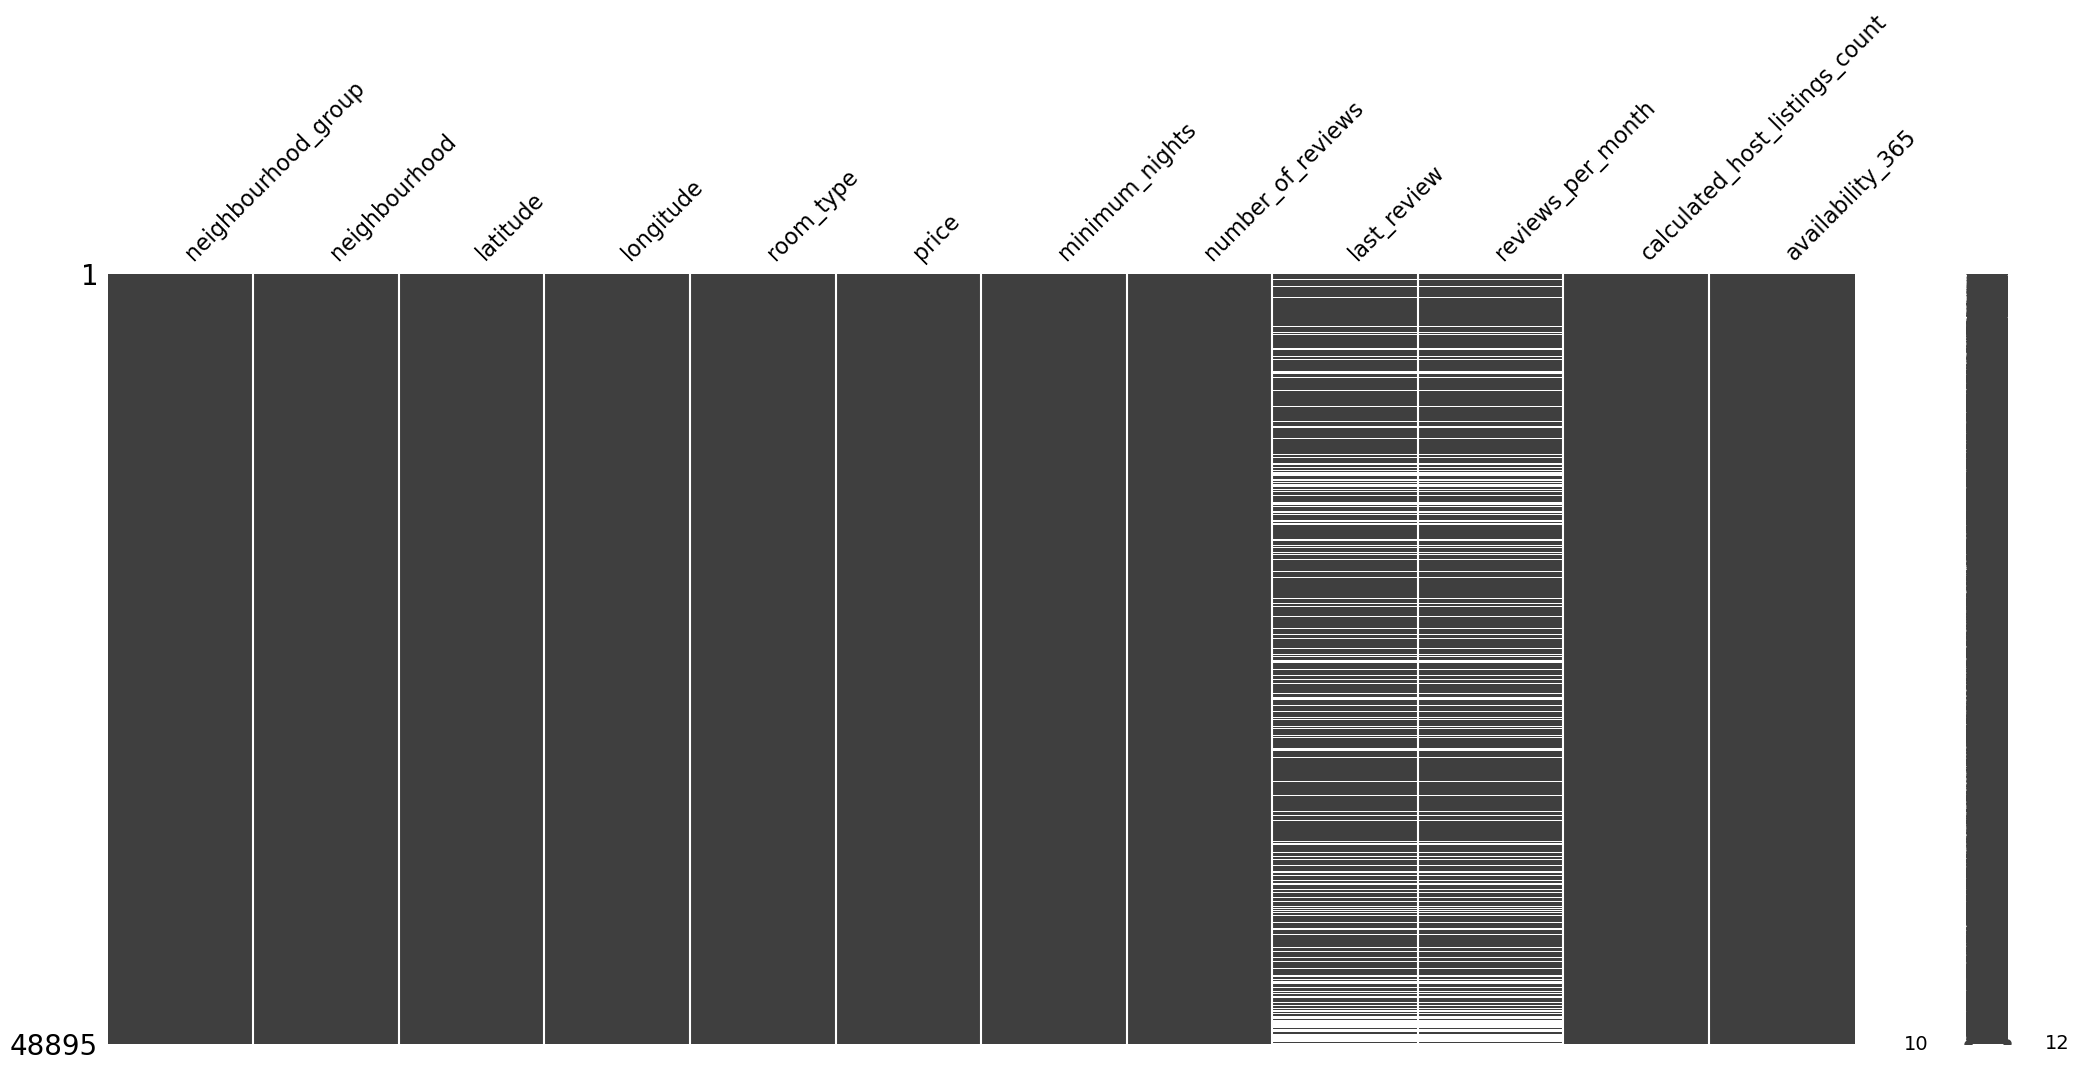

In [35]:
msno.matrix(df)
plt.show()

In [37]:
df['reviews_per_month'].fillna(value=0, inplace=True)
df.drop('last_review',axis=1,inplace=True)

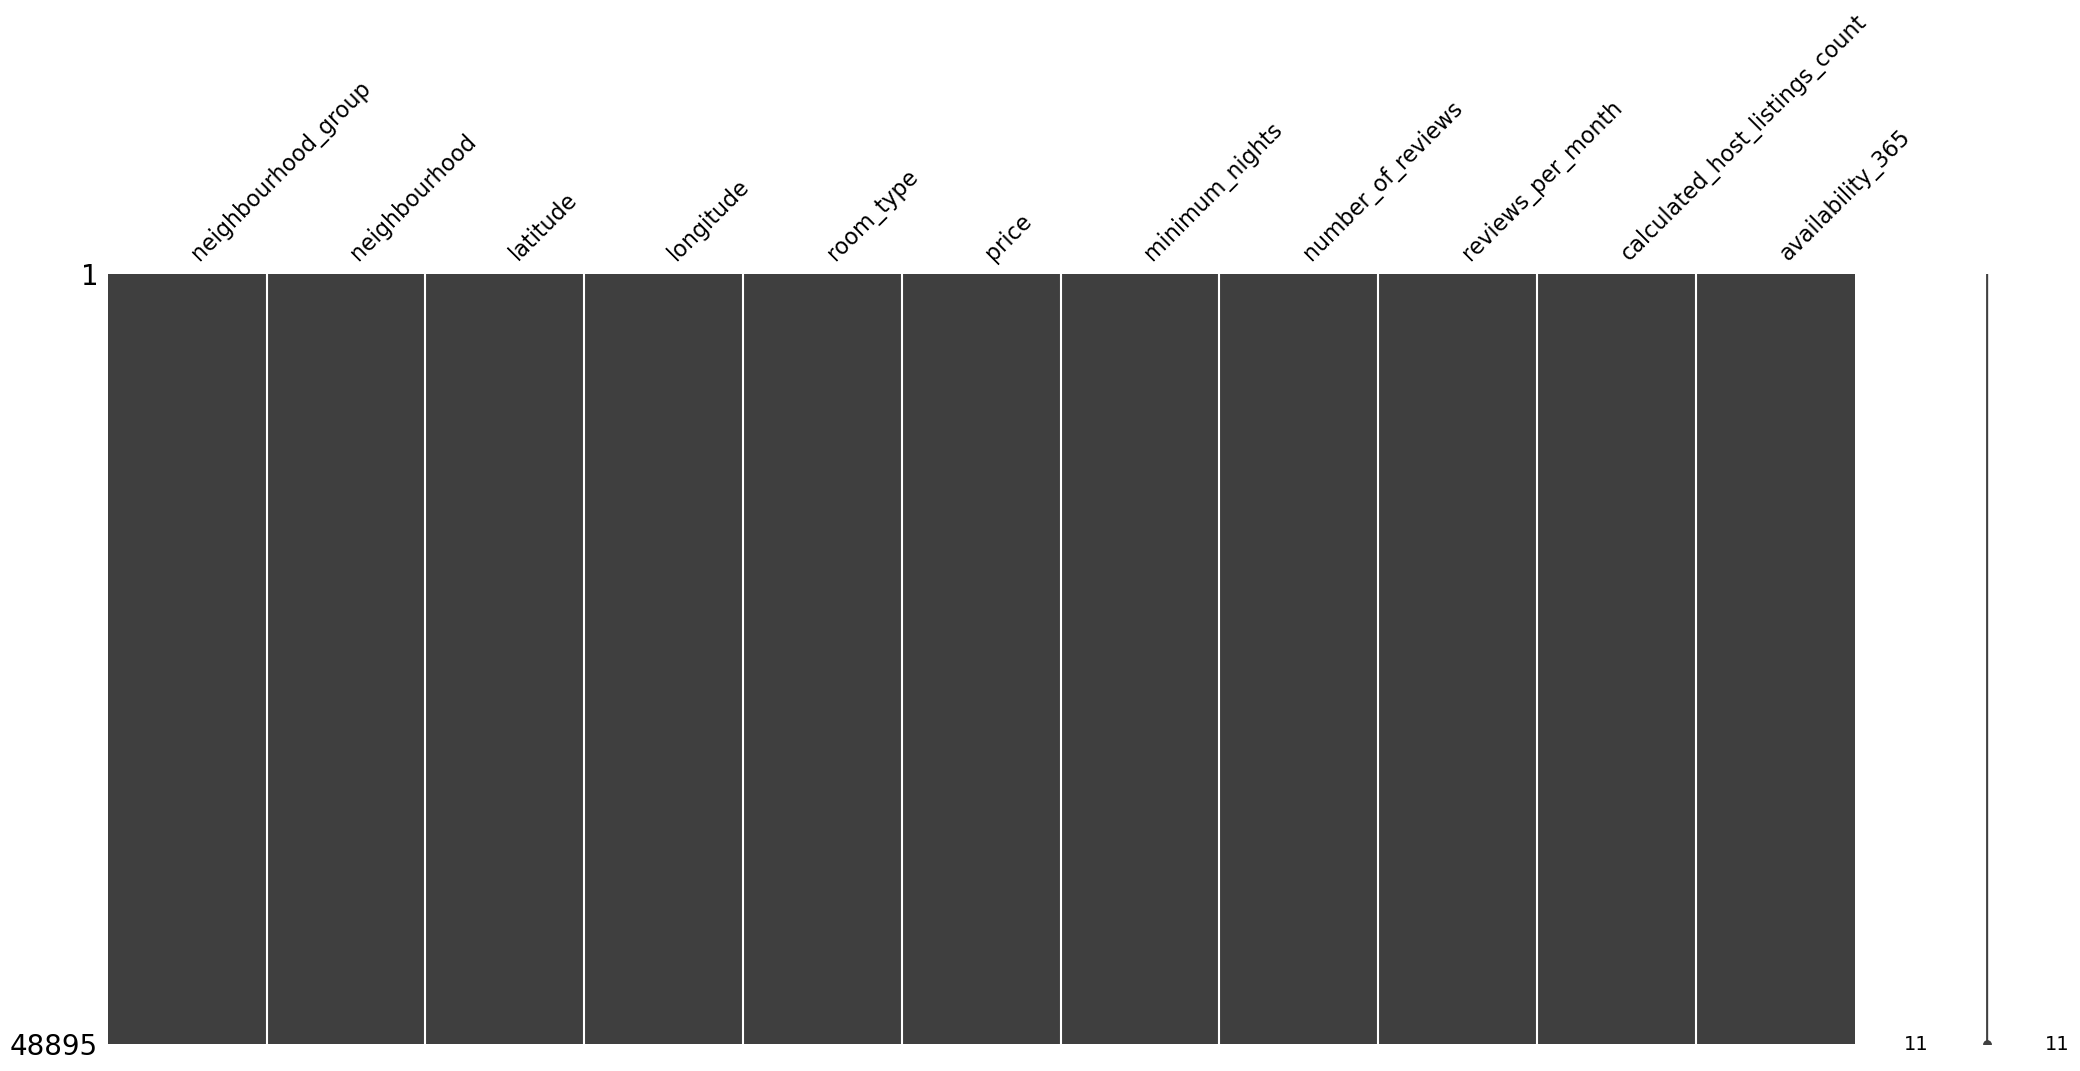

In [38]:
msno.matrix(df)
plt.show()

In [39]:
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


# Outliers


In [40]:
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


# The Tukey fence method

In [41]:
def tukey_fence(df, column):
  Q1 = np.percentile(df[column], 25)
  Q3 = np.percentile(df[column], 75)
  IQR = Q3 - Q1
  outlier_step = 1.5 * IQR
  outliers_index = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step)].index
  return outliers_index

In [46]:
outliers_index = tukey_fence(df,'price')
df.drop(outliers_index, inplace=True)
df.reset_index(drop=True, inplace=True)

# The Zero prices in the price column

In [51]:
df[df['price'] ==0].head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
21946,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,0.05,4,28
24114,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2.56,4,127
24304,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,0.71,5,0
24420,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,0.53,2,0
24443,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,0.15,1,73


In [54]:
len(df[df['price'] ==0])

11

There are 11 listings with prices equal to 0

In [56]:
df.drop(df[df['price'] ==0].index, inplace = True)

In [57]:
df.reset_index(drop = True, inplace = True )

In [58]:
df.shape

(45912, 11)

# Visualization

In [72]:
listings = df['neighbourhood_group'].value_counts()
print(listings)

Manhattan        19505
Brooklyn         19406
Queens            5567
Bronx             1069
Staten Island      365
Name: neighbourhood_group, dtype: int64


# Neighbourhoods and share of accommodations

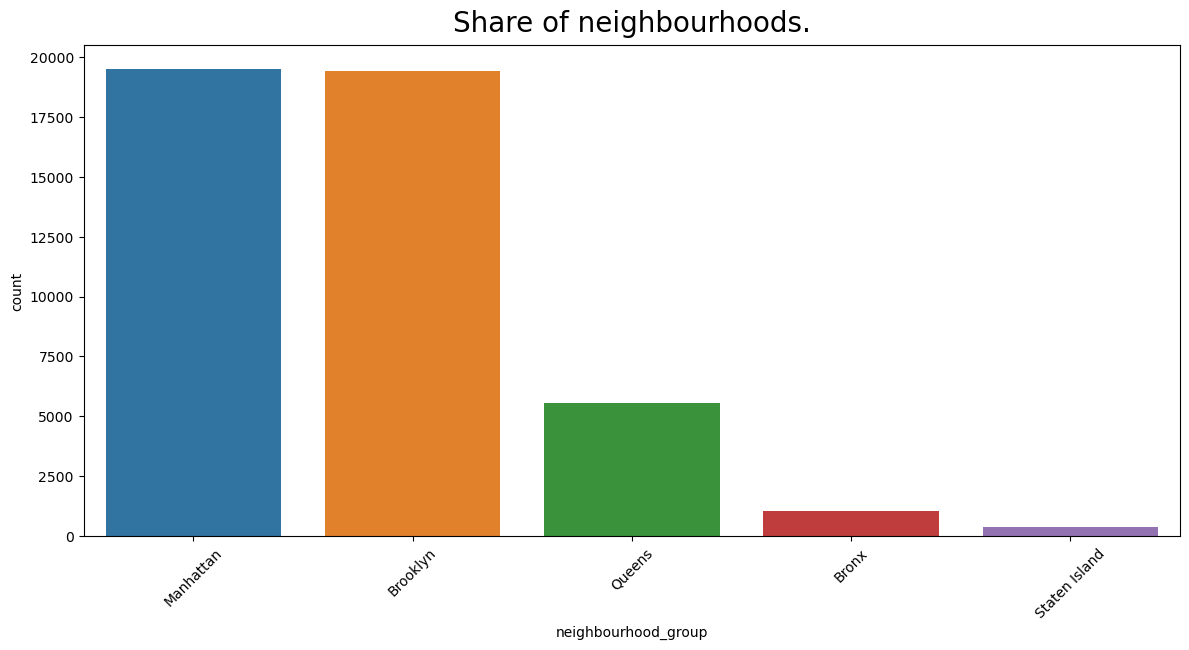

In [79]:
order = df['neighbourhood_group'].value_counts().index

plt.figure(figsize=(12, 6))
listings1plot = sns.countplot(data=df, x='neighbourhood_group', order=order)
plt.title('Share of neighbourhoods.', size=20, pad=10)
plt.tight_layout()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show() 

Manhattan and Brooklyn tops in the neighbourhood_groups with high no of houses

# Price distributin in various cities

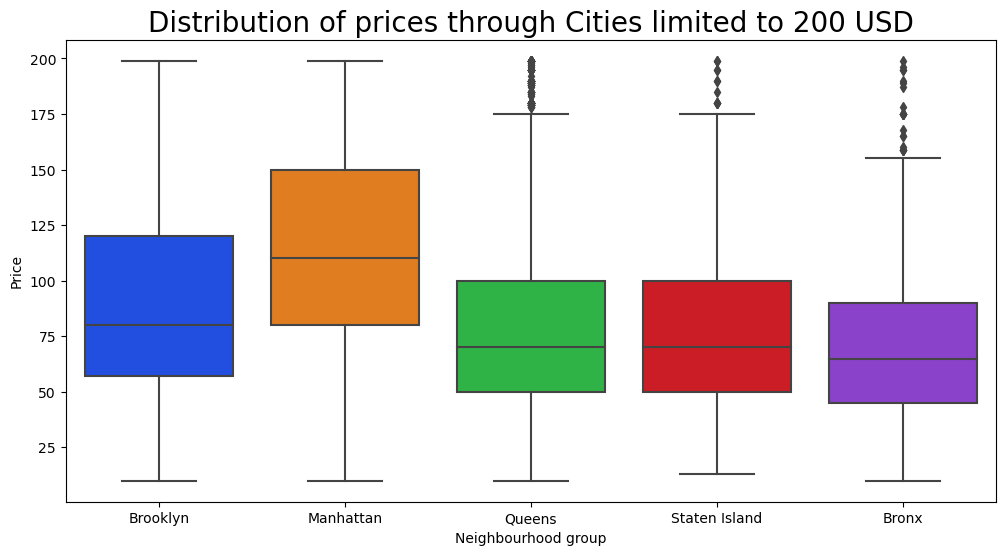

In [83]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[df.price <200], x='neighbourhood_group', y='price', palette='bright')
plt.title('Distribution of prices through Cities limited to 200 USD', fontsize=20)
plt.xlabel('Neighbourhood group')
plt.ylabel("Price")
plt.show()

# Room types and Prices

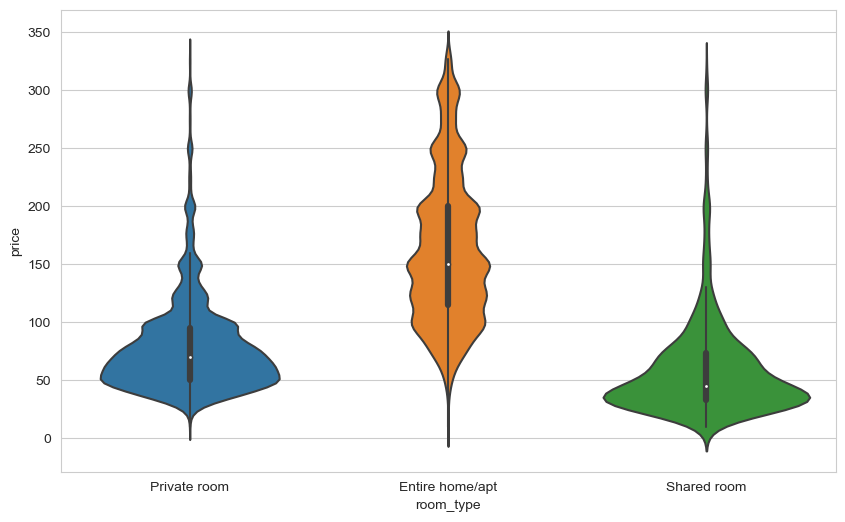

In [84]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
sns.violinplot(data=df, x='room_type', y='price')
plt.show()

# Correlation

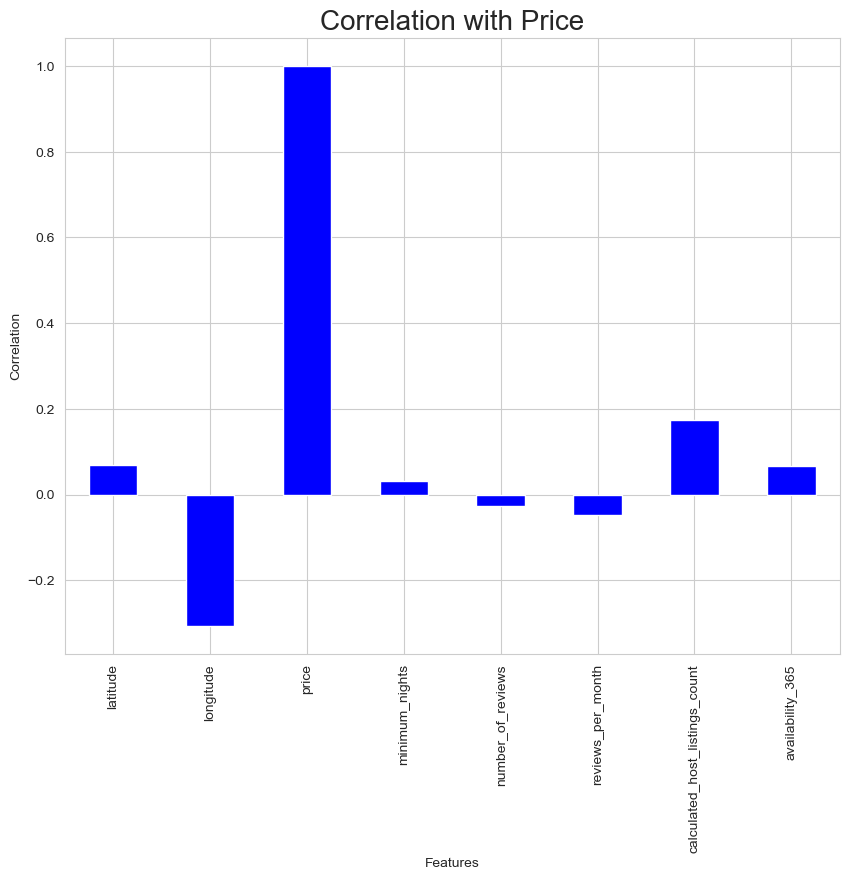

In [92]:
correlation_matrix = df.corrwith(df['price'])
plt.figure(figsize=(10, 8))
correlation_matrix.plot(kind='bar', color='blue')
plt.title('Correlation with Price', size=20)
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.show()


# Preprocessing

In [98]:
#Converting all columns to quantitative
labelencoder = LabelEncoder()
df['neighbourhood'] = labelencoder.fit_transform(df['neighbourhood'])
df['neighbourhood_group'] = labelencoder.fit_transform(df['neighbourhood_group'])

In [103]:
df = pd.get_dummies(df, drop_first=True)


In [104]:
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,1,107,40.64749,-73.97237,149,1,9,0.21,6,365,0,1,0
1,2,126,40.75362,-73.98377,225,1,45,0.38,2,355,1,0,0
2,2,93,40.80902,-73.94190,150,3,0,0.00,1,365,0,1,0
3,1,41,40.68514,-73.95976,89,1,270,4.64,1,194,1,0,0
4,2,61,40.79851,-73.94399,80,10,9,0.10,1,0,1,0,0


In [105]:
df.shape

(45912, 13)

In [107]:
columns_to_scale = df.drop(columns=['price'])

In [108]:
# Initializihg the StandardScaler
scaler = StandardScaler()

# Fitting and transforming the data using the scaler
scaled_data = scaler.fit_transform(columns_to_scale)

In [133]:

# Creating a DataFrame with the scaled data
scaled_df = pd.DataFrame(data=scaled_data, columns=columns_to_scale.columns)

final_df = pd.concat([scaled_df, df['price']], axis=1)


In [135]:
final_df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,price
0,-0.893662,0.020204,-1.463916,-0.465454,-0.299002,-0.329691,-0.556643,-0.020646,1.962068,-0.992665,1.043050,-0.159282,149
1,0.444339,0.297144,0.454122,-0.710760,-0.299002,0.464735,-0.451221,-0.149631,1.885312,1.007389,-0.958727,-0.159282,225
2,0.444339,-0.183858,1.455341,0.190201,-0.198294,-0.528298,-0.686870,-0.181877,1.962068,-0.992665,1.043050,-0.159282,150
3,-0.893662,-0.941799,-0.783485,-0.194111,-0.299002,5.429899,2.190524,-0.181877,0.649541,1.007389,-0.958727,-0.159282,89
4,0.444339,-0.650283,1.265398,0.145229,0.154186,-0.329691,-0.624857,-0.181877,-0.839526,1.007389,-0.958727,-0.159282,80


In [136]:
# Split the data into features (X) and the target variable (y)
X = final_df.drop(columns=['price'])
y = final_df['price']

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [138]:
# Check the number of samples and features in X
num_samples, num_features = X.shape
print(f"Number of samples in X: {num_samples}")
print(f"Number of features in X: {num_features}")

# Check the number of samples in y (assuming it's a 1D array)
num_samples_in_y = y.shape[0]
print(f"Number of samples in y: {num_samples_in_y}")


Number of samples in X: 45912
Number of features in X: 12
Number of samples in y: 45912


In [126]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [127]:
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [139]:
y_pred = linear_model.predict(X_test)

In [140]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Root Mean Squared Error (RMSE): 49.84


In [144]:
y_predict = random_forest_model.predict(X_test)

In [145]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_predict)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 31.53


In [146]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_predict)
print(f"Mean Squared Error (MSE): {mse:.2f}")

Mean Squared Error (MSE): 1924.79


In [147]:
# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_predict, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Root Mean Squared Error (RMSE): 43.87


In [ ]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_predict)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

In [148]:
# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_predict)
print(f"R-squared (R2) Score: {r2:.2f}")


R-squared (R2) Score: 0.57


From the above evaluations, random forest appears to perform better than linear Regression model


Linear Model RMSE: 49.84


RandomForest RMSE : 43.87